# Deterministic Modelling in the Theory of Contagious Disease

This notebook walks through the paper "Deterministic model in the theory of contagious disease," by Caldwell, J. and Yan, T.H., published in; Int. J. Math. Educ. Sci. Techol., 31, 2000, 249-260.

In this notebook we will summarize some of the work done and build some of the mathematical models that are built.



## Modelling Contagious Disease

Let _t_ be the independent variable, $I(t)$ and $S(t)$ be continuous where:

$S(t) = $ number of susceptibles at time _t_.

$I(t) = $ number of infectives at time _t_.

Making a significant assumption that the rate of occurrence of new infections is proportional to both the number of infectives and succeptables:

$I(t+\Delta t)=I(t)+\beta I(t)S(t)\Delta t$

The number of succeptables is only proportional to the number of infectives and the number of succeptables. If infectives are removed from the system/community they will not continue the spread. The differential equation:

$ \displaystyle \frac{dS(t)}{dt} = \displaystyle -\beta S(t)I(t)$

The removals should be considered for the DE for the infectives as the removals include infectives who are isolated, dead or recovered and immune. The immune and or recovered would then enter a new class that are not succeptable to the disease:

$ \displaystyle \frac{dI}{dt} = \displaystyle \beta S(t)I(t) - \gamma I(t)$

The number of removals, or those removed from the infectives by means of death, immunization and cured with the removal rate $\gamma$:

$ \displaystyle \frac{dR(t)}{dt} = \displaystyle \gamma I(t)$

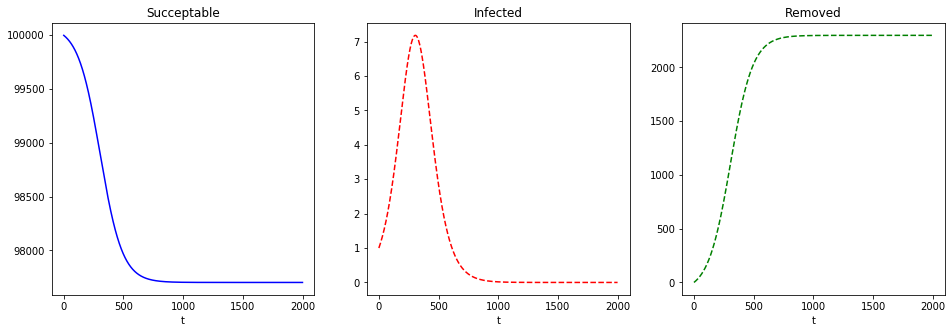

In [6]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint

beta = 9e-6 # Infection (contact) rate
gamma = 0.89 # removal rate (cured, immunized, death)

def contagious_disease(x, t):
    S = x[0] # Succeptable
    I = x[1] # Infected
    R = x[2] # Removed
    dSdt = -beta * S *I
    dIdt = (beta * S * I) - (gamma * I)
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Our initial conditions: 99999 succeptable, 1 infected, 0 removed.
x0 = [99999, 1, 0]

t = range(2000)
res = odeint(contagious_disease, x0, t)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
ax1.plot(t,res[:,0],'b-')
ax1.set_title('Succeptable')
ax1.set_xlabel('t')
ax2.plot(t,res[:,1],'r--')
ax2.set_title('Infected')
ax2.set_xlabel('t')
ax3.plot(t,res[:,2],'g--')
ax3.set_title('Removed')
ax3.set_xlabel('t')
plt.show()

<u>References</u>

_Caldwell, J. and Ram, Y.M., "Study of a deterministic model in the theory of
contagious disease," Int. J. Math. Educ. Sci. Techol., 26, 1995, 639-646._